In [73]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math
import warnings


#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
 #   print(df)

In [2]:
data = pd.read_excel('./CFTR-interactome-data_merged_20210705_2.xlsx')

In [3]:
# drop runs 7,8, and 9 
keep_run = []
for i in data:
    if 'Run 7' not in i and 'Run 9' not in i and 'Run 8' not in i:
        keep_run.append(i)
        
data2 = data[keep_run]

In [4]:
run_meds = {'Run 1': [], 'Run 2': [], 'Run 3': [], 'Run 4': [],
            'Run 5': [], 'Run 6': [], 'Run 10': [], 'Run 11': [], 'Run 12' : [], 'Run 13' : []}

for i in data2:
    if 'Run 1 ' in i:
        run_meds['Run 1'].append(data2[i].median())
    if 'Run 2 ' in i:
        run_meds['Run 2'].append(data2[i].median())
    if 'Run 3 ' in i:
        run_meds['Run 3'].append(data2[i].median())
    if 'Run 4 ' in i:
        run_meds['Run 4'].append(data2[i].median())
    if 'Run 5 ' in i:
        run_meds['Run 5'].append(data2[i].median())
    if 'Run 6 ' in i:
        run_meds['Run 6'].append(data2[i].median())
    if 'Run 10 ' in i:
        run_meds['Run 10'].append(data2[i].median())
    if 'Run 11 ' in i:
        run_meds['Run 11'].append(data2[i].median())
    if 'Run 12 ' in i:
        run_meds['Run 12'].append(data2[i].median())
    if 'Run 13 ' in i:
        run_meds['Run 13'].append(data2[i].median())
        
        
data3 = pd.DataFrame()
data3['Gene Name'] = data2['Gene Name']
for i in data2:
    if 'Run' in i:
        run = ' '.join(i.split(' ')[0:2])
        norm = np.mean(run_meds[run])/ data2[i].median()
        data3[i] = data2[i]*norm

In [5]:
WT_DMSO = []
WT_VX809 = []
F508del_DMSO = []
F508del_VX809 = []
P67L_DMSO = []
P67L_VX809 = [] 
L206W_DMSO = []
L206W_VX809 = [] 
G85E_DMSO = []
G85E_VX809 = [] 
mock = []
for i in data3:
    if "WT-DMSO" in i:
        WT_DMSO.append(i)
    if "WT-VX809" in i:
        WT_VX809.append(i)
    if "F508del-DMSO" in i:
        F508del_DMSO.append(i)
    if "F508del-VX809" in i:
        F508del_VX809.append(i)
    if 'td-tomato' in i or 'TD-tomato' in i:
        mock.append(i)
    if "P67L-DMSO" in i:
        P67L_DMSO.append(i)
    if "P67L-VX809" in i:
        P67L_VX809.append(i)
    if "L206W-DMSO" in i:
        L206W_DMSO.append(i)
    if "L206W-VX809" in i:
        L206W_VX809.append(i)
    if "G85E-DMSO" in i:
        G85E_DMSO.append(i)
    if "G85E-VX809" in i:
        G85E_VX809.append(i)

In [6]:
data4 = data3.set_index('Gene Name')

In [7]:
replicates =12

In [8]:
conditions = ['WT-DMSO', 'WT-VX809', "F508del-DMSO", "F508del-VX809", "P67L-DMSO","P67L-VX809", "L206W-DMSO", "L206W-VX809", "G85E-DMSO", "G85E-VX809" ]

In [81]:
cln_df = pd.DataFrame(columns = conditions, index=range(replicates))

cln_df


,WT-DMSO,WT-VX809,F508del-DMSO,F508del-VX809,P67L-DMSO,P67L-VX809,L206W-DMSO,L206W-VX809,G85E-DMSO,G85E-VX809
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
cln_df['WT-DMSO']= pd.Series(list(data4.loc['CFTR'][WT_DMSO]))
cln_df['WT-VX809']= pd.Series(list(data4.loc['CFTR'][WT_VX809]))
cln_df['F508del-DMSO']= pd.Series(list(data4.loc['CFTR'][F508del_DMSO]))
cln_df['F508del-VX809']= pd.Series(list(data4.loc['CFTR'][F508del_VX809]))
cln_df['P67L-DMSO']= pd.Series(list(data4.loc['CFTR'][P67L_DMSO]))
cln_df['P67L-VX809']= pd.Series(list(data4.loc['CFTR'][P67L_VX809]))
cln_df['L206W-DMSO']= pd.Series(list(data4.loc['CFTR'][L206W_DMSO]))
cln_df['L206W-VX809']= pd.Series(list(data4.loc['CFTR'][L206W_VX809]))
cln_df['G85E-DMSO']= pd.Series(list(data4.loc['CFTR'][G85E_DMSO]))
cln_df['G85E-VX809']= pd.Series(list(data4.loc['CFTR'][G85E_VX809]))

In [83]:
cln_df = np.log2(cln_df)

In [84]:
cln_df

,WT-DMSO,WT-VX809,F508del-DMSO,F508del-VX809,P67L-DMSO,P67L-VX809,L206W-DMSO,L206W-VX809,G85E-DMSO,G85E-VX809
0,14.791337,14.797505,13.760444,14.305484,13.573603,13.846163,12.555914,13.411062,13.522659,13.677565
1,13.483389,14.190085,13.220276,13.539005,13.140527,13.151705,16.099369,16.201937,13.170755,12.803120
2,9.728918,10.458313,13.473443,13.780094,13.409881,13.501917,12.460674,12.792538,10.540713,10.591506
3,15.026819,14.991823,13.295950,12.863862,13.116081,13.063275,10.837358,11.408802,11.208029,11.380725
4,14.253839,14.919716,8.571539,9.956374,8.963466,9.214733,14.651633,15.493151,12.991343,12.915494
5,17.036836,12.936985,8.912743,8.853349,7.720259,8.356870,12.736631,13.481227,11.347332,11.487410
6,13.246280,12.329128,13.926649,14.718342,13.627055,14.350647,12.047098,12.932369,11.564212,11.658685
7,12.378877,13.679762,13.574337,13.887461,13.175857,13.359609,NaN,NaN,11.763213,11.967238
8,14.066696,NaN,13.822758,13.491005,13.662974,14.694345,NaN,NaN,NaN,NaN
9,13.009493,NaN,11.863388,11.683354,15.969774,16.701967,NaN,NaN,NaN,NaN


In [59]:
labels_df = pd.DataFrame(columns = conditions, index=range(replicates))

for j in labels_df:
    count = 0 
    for i in data4.columns:
        if j in i.split(' ')[2] :
            labels_df[j].loc[count] = str(i.split(' ')[0] + i.split(' ')[1])
            count +=1

In [77]:
labels_df2

,WT-DMSO,WT-VX809,F508del-DMSO,F508del-VX809,P67L-DMSO,P67L-VX809,L206W-DMSO,L206W-VX809,G85E-DMSO,G85E-VX809
0,Run1,Run1,Run1,Run1,Run1,Run1,Run5,Run5,Run5,Run5
1,Run2,Run2,Run1,Run1,Run1,Run1,Run6,Run6,Run7,Run7
2,Run3,Run3,Run2,Run2,Run2,Run2,Run7,Run7,Run8,Run8
3,Run4,Run4,Run2,Run2,Run2,Run2,Run8,Run8,Run9,Run9
4,Run5,Run5,Run3,Run3,Run3,Run3,Run9,Run9,Run9,Run9
5,Run6,Run7,Run3,Run3,Run3,Run3,Run9,Run9,Run10,Run10
6,Run7,Run8,Run4,Run4,Run4,Run4,Run10,Run10,Run10,Run10
7,Run8,Run10,Run4,Run4,Run4,Run4,,,Run10,Run10
8,Run9,,Run5,Run5,Run5,Run5,,,,
9,Run10,,Run7,Run7,Run6,Run6,,,,


In [61]:
for i in labels_df:
    for j,val in enumerate(labels_df[i]):
        if val == 'Run10':
            labels_df.loc[j][i] = 'Run7'

        if val == 'Run11':
            labels_df.loc[j][i] = 'Run8'
            
        if val == 'Run12':
            labels_df.loc[j][i] = 'Run9'

        if val == 'Run13':
            labels_df.loc[j][i] = 'Run10'

In [89]:
labels_df2 = labels_df.fillna(' ')

In [16]:

cols = ['WT-DMSO', 'WT-VX809', "F508del-DMSO", "F508del-VX809", "P67L-DMSO","P67L-VX809", "L206W-DMSO", "L206W-VX809", "G85E-DMSO", "G85E-VX809" ]
cln_df = cln_df[cols]
#cln_df_norm = cln_df_norm[cols]
#labels_df = labels_df[cols]



In [85]:
plot_df = cln_df

In [91]:
plot_df2 = plot_df.fillna(-1)

In [92]:
len([x for x in range(0,len(plot_df.columns))])

10

In [93]:
%matplotlib inline

In [94]:
warnings.filterwarnings("ignore")

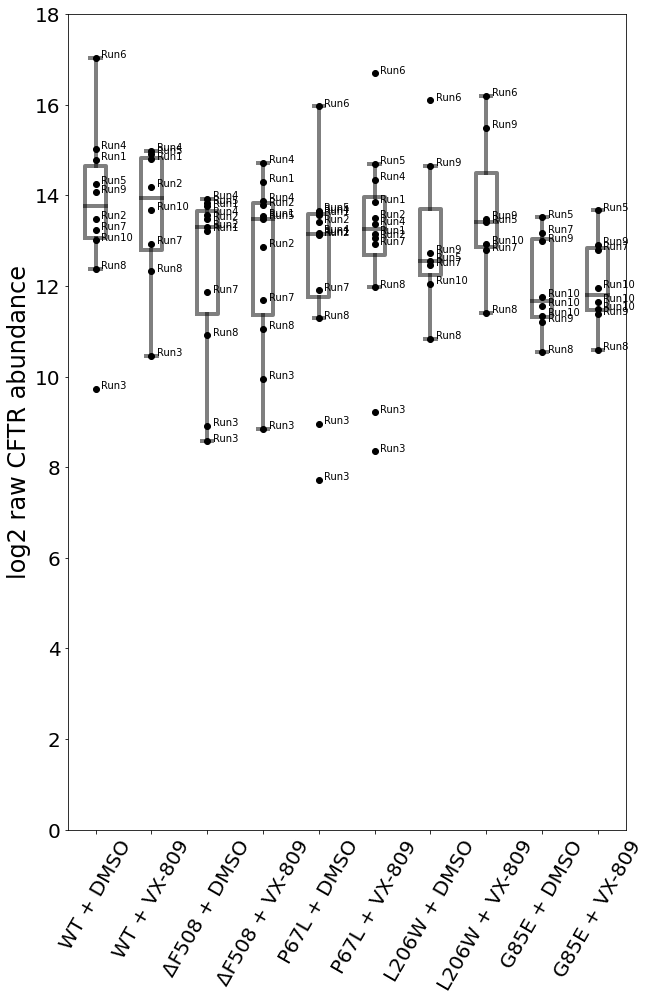

In [96]:
warnings.filterwarnings( "ignore", module = "matplotlib\..*" )

plt.figure(figsize=(10,15))
plt.boxplot(x = [plot_df[x][~np.isnan(plot_df[x])]   for x in plot_df.columns], 
           positions = [x for x in range(0,len(plot_df.columns))],
           widths=.37,
           boxprops=dict(color='k', lw=4, alpha=0.5),
           capprops=dict(color='k', lw=4, alpha=0.5),
           whiskerprops=dict(color='k', lw=4, alpha=0.5),
           medianprops=dict(color='k', lw =4, alpha=0.5), 
           showfliers=0)

count = -1
for i in plot_df.columns:
    plt.scatter(np.ones(len(plot_df2[i]))+count, list(plot_df2[i]), color = 'k', zorder =0)
    ## add labels 
    for j in range(len(plot_df)):
        plt.text(x =1+count+0.1, y = plot_df2[i][j], s =labels_df2[i][j], zorder = 1, size=10)
       
    count += 1
    


label_list = ['WT + DMSO', 'WT + VX-809', '\u0394F508 + DMSO',  '\u0394F508 + VX-809', 
              'P67L + DMSO', 'P67L + VX-809', 'L206W + DMSO', 'L206W + VX-809', 
             'G85E + DMSO' , 'G85E + VX-809']
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9],labels = label_list ,size=20, rotation=60)
plt.yticks(size=20)
plt.ylabel('log2 raw CFTR abundance', fontsize= 24)
plt.ylim(0,18)


#extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
plt.savefig('../Figures/Box_Plots_of_CFTR_quantification.svg', format='svg')





In [42]:

print(labels)

['WT-DMSO', 'WT-VX809', 'F508del-DMSO', 'F508del-VX809', 'P67L-DMSO', 'P67L-VX809', 'L206W-DMSO', 'L206W-VX809', 'G85E-DMSO', 'G85E-VX809']
